# Final Project DATA 601

Dataset Link - https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global

In [1]:
#importing libraries which needed

import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading csv files in the dataframe

data = pd.read_csv('FullData.csv')
pnames = pd.read_csv('PlayerNames.csv')
cnames = pd.read_csv('ClubNames.csv')

In [3]:
data

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,NaN,Wexford Youths,Sub,30.0,02/01/2016,2020.0,45,...,13,11,13,15,12,39,44,52,41,46
17584,Dylan McGoey,Republic of Ireland,NaN,NaN,Longford Town,Sub,28.0,01/01/2016,2020.0,45,...,11,12,13,16,12,47,39,46,46,46
17585,Tommy Ouldridge,England,NaN,NaN,Swindon Town,Res,32.0,03/03/2015,2023.0,45,...,42,35,36,42,37,15,7,13,14,7
17586,Mark Foden,Scotland,NaN,NaN,Ross County,Sub,45.0,03/02/2016,2017.0,45,...,12,13,12,24,12,40,45,44,43,45


In [4]:
pnames

,Name,url
0,Cristiano Ronaldo,/player/20801/cristiano-ronaldo/
1,Lionel Messi,/player/158023/lionel-messi/
2,Neymar,/player/190871/neymar/
3,Luis Suárez,/player/176580/luis-su%C3%A1rez/
4,Manuel Neuer,/player/167495/manuel-neuer/
...,...,...
17583,Adam Dunbar,/player/233107/adam-dunbar/
17584,Dylan McGoey,/player/232965/dylan-mcgoey/
17585,Tommy Ouldridge,/player/227986/tommy-ouldridge/
17586,Mark Foden,/player/212270/mark-foden/


In [5]:
cnames

,Name,url
0,FC Bayern,/team/21/fc-bayern/
1,Real Madrid,/team/243/real-madrid/
2,FC Barcelona,/team/241/fc-barcelona/
3,Juventus,/team/45/juventus/
4,Manchester Utd,/team/11/manchester-utd/
...,...,...
628,Finn Harps,/team/111131/finn-harps/
629,Galway United,/team/1571/galway-united/
630,Longford Town,/team/1586/longford-town/
631,Wexford Youths,/team/111968/wexford-youths/


In [6]:
#We can see that dataset is loaded into dataframes. Now, we will drop the columns which is not related to our project.

#We will drop columns like kit numbers, nationality and etc.

del data['Nationality']
del data['National_Position']
del data['National_Kit']
del data['Club_Kit']
del data['Club_Joining']
del data['Contract_Expiry']

In [7]:
data

,Name,Club,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Real Madrid,LW,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,FC Barcelona,RW,93,170 cm,72 kg,Left,06/24/1987,29,RW,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,FC Barcelona,LW,92,174 cm,68 kg,Right,02/05/1992,25,LW,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,FC Barcelona,ST,92,182 cm,85 kg,Right,01/24/1987,30,ST,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,FC Bayern,GK,92,193 cm,92 kg,Right,03/27/1986,31,GK,...,16,14,11,47,11,91,89,95,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Wexford Youths,Sub,45,183 cm,82 kg,Right,01/04/1998,19,GK,...,13,11,13,15,12,39,44,52,41,46
17584,Dylan McGoey,Longford Town,Sub,45,185 cm,80 kg,Right,11/08/1997,19,GK,...,11,12,13,16,12,47,39,46,46,46
17585,Tommy Ouldridge,Swindon Town,Res,45,173 cm,61 kg,Right,11/26/1998,18,CM,...,42,35,36,42,37,15,7,13,14,7
17586,Mark Foden,Ross County,Sub,45,180 cm,80 kg,Right,03/19/1996,21,GK,...,12,13,12,24,12,40,45,44,43,45


In [8]:
data.count()

Name                  17588
Club                  17588
Club_Position         17587
Rating                17588
Height                17588
Weight                17588
Preffered_Foot        17588
Birth_Date            17588
Age                   17588
Preffered_Position    17588
Work_Rate             17588
Weak_foot             17588
Skill_Moves           17588
Ball_Control          17588
Dribbling             17588
Marking               17588
Sliding_Tackle        17588
Standing_Tackle       17588
Aggression            17588
Reactions             17588
Attacking_Position    17588
Interceptions         17588
Vision                17588
Composure             17588
Crossing              17588
Short_Pass            17588
Long_Pass             17588
Acceleration          17588
Speed                 17588
Stamina               17588
Strength              17588
Balance               17588
Agility               17588
Jumping               17588
Heading               17588
Shot_Power          

As we can see there is not empty cells, so we can now proceed to <b>visulization</b>.

In [9]:
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d

Text(0.5, 1.0, 'Players Ages Probabilites')

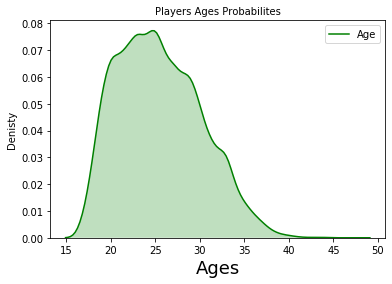

In [10]:
#Get age of all players
age_player = data["Age"]

sns.kdeplot(age_player,shade=True, color="g")
plt.xlabel('Ages', fontsize=18)
plt.ylabel('Denisty', fontsize=10)
plt.title('Players Ages Probabilites', fontsize=10)

<b>As we can see, most of the players in the dataset are around the age of 25.</b>

Text(0.5, 1.0, 'Players Rating Probabilites')

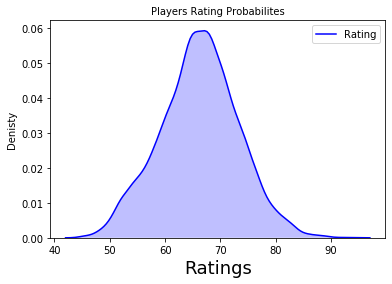

In [11]:
#Get ratings of all players
rating_player = data["Rating"]

sns.kdeplot(rating_player,shade=True, color="b")
plt.xlabel('Ratings', fontsize=18)
plt.ylabel('Denisty', fontsize=10)
plt.title('Players Rating Probabilites', fontsize=10)

<b>Most of the players in the dataset have ratings around 65. </b>

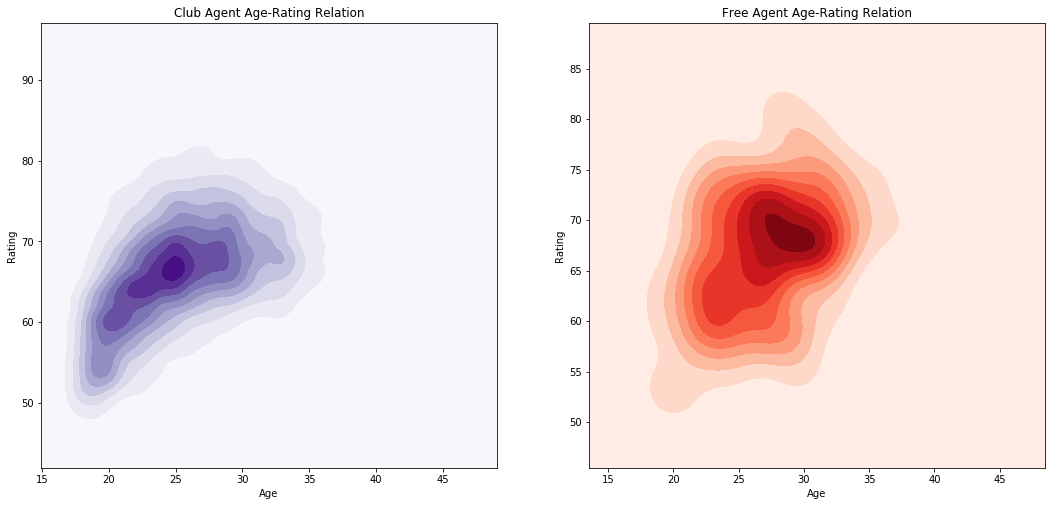

In [12]:
Free_Agents = data[data.Club == 'Free Agents']
Club_Agents = data[data.Club != 'Free Agents']

fig = plt.figure(figsize=(18, 18))
ax1 = fig.add_subplot(222)
ax1.set_title('Free Agent Age-Rating Relation')
ax2 = fig.add_subplot(221)
ax2.set_title('Club Agent Age-Rating Relation')

sns.kdeplot(Free_Agents.Age,Free_Agents.Rating, shade=True,cmap="Reds",ax=ax1)
sns.kdeplot(Club_Agents.Age,Club_Agents.Rating, shade=True,cmap="Purples",ax=ax2)

<b>What is free agent and club agent????</b>

A free agent is a player who is eligible to sign with other clubs or franchises without any payment to current club.

A club agent is a player who is currenlty signed with some club.

<b>As we can see in the distributions graphs above, most of the free agent players are in 30 or older and have average ratings of 70. While club agent players are around 25 or younger and have average rating between 65 to 70.</b>

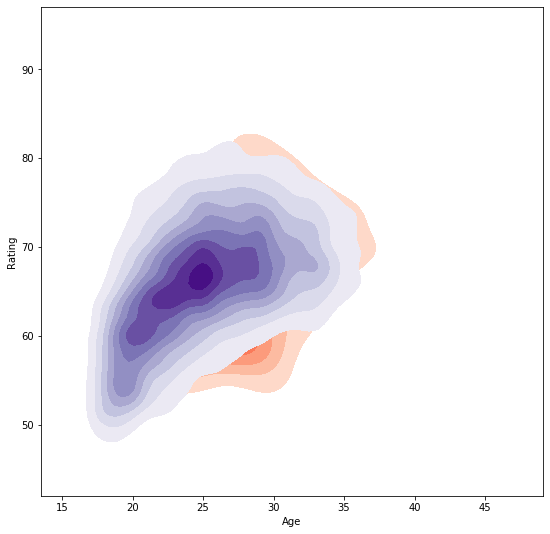

In [13]:
fig = plt.figure(figsize=(9,9))
sns.kdeplot(Free_Agents.Age, Free_Agents.Rating,cmap="Reds", shade=True, shade_lowest=False)
sns.kdeplot(Club_Agents.Age,Club_Agents.Rating ,cmap="Purples", shade=True, shade_lowest=False)

<b>Prediction:</b>

From our previous figures, we can predict that players who are 30 or older and have ratings under 65 are highly likely to be free agents.

In [14]:
#Lists of all positions
Defenders =['CB','RCB','LCB','RB','LB','LWB','RWB']
Strikers =['CF','RW','LW','RF','LF','RS','LS','ST']
Midfielders =['CDM','CM','CAM','RM','LM','LCM','RCM','LDM','RDM','LAM','RAM']
GoalKeepers =['GK']

<b>Now, we will make group of data for each position so we can compare the average rating at each position.</b>

In [15]:
import scipy.interpolate as spi

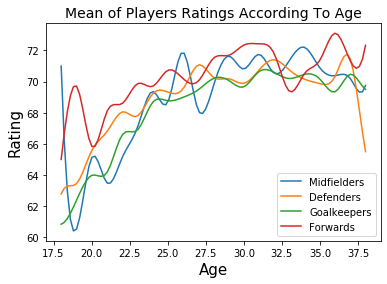

In [16]:
# we will perform similar steps to group players with the same position, for each 4 groups.

#1. Get all data from same position
#2. Groupby Age and Ratings as These are the only data we need for rating analysis
#3. Get age data
#4. Get rating data
#5. Interpolate in order to predict missing values between the data

# applying the above steps to group defenders
defenders = data[data.Club_Position.isin(Defenders)]
group = defenders.groupby("Age")["Rating"].mean().reset_index()
age_DF = group["Age"]
rating_DF = group["Rating"]
inter_DF = interp1d(age_DF, rating_DF, kind='cubic')

# applying the steps to group midfielders
Midfielders = data[data.Club_Position.isin(Midfielders)]
group = Midfielders.groupby("Age")["Rating"].mean().reset_index()
age_MF = group["Age"]
rating_MF = group["Rating"]
inter_MF = interp1d(age_MF, rating_MF, kind='cubic')

# applying the steps to group strikers
Strikers = data[data.Club_Position.isin(Strikers)]
group = Strikers.groupby("Age")["Rating"].mean().reset_index()
age_ST = group["Age"]
rating_ST = group["Rating"]
inter_ST = interp1d(age_ST, rating_ST, kind='cubic')


# applying the steps to group goalkeepers
goalkeepers = data[data.Club_Position.isin(GoalKeepers)]
group = goalkeepers.groupby("Age")["Rating"].mean().reset_index()
age_GK = group["Age"]
rating_GK = group["Rating"]
inter_GK = interp1d(age_GK, rating_GK, kind='cubic')


# we will assign the age range as new age for the player to use the interpolation we assigned to each group.
new_age = np.linspace(18,38, num=100, endpoint=True)

plt.xlabel('Age', fontsize=15)
plt.ylabel('Rating', fontsize=15)
plt.title('Mean of Players Ratings According To Age',fontsize=14)
plt.plot( new_age, inter_GK(new_age), "-",new_age, inter_MF(new_age), "-", new_age, inter_DF(new_age), "-",new_age, inter_ST(new_age), "-")
plt.legend(["Midfielders", "Defenders","Goalkeepers","Forwards"], loc='best', fontsize = 10)

<b>We can see that forwards have overall highest average ratings among all 4 groups.</b>

Now, let's try to find which players is best for which position from the statistics.

Let's start with the goalkeepers.

In [17]:
# we will assign weight to each integer so we can consider skills according to the trait we need in a player.

a = 0.5
b = 1
c = 2
d = 3

In [18]:
#GoalKeeping Traits

data['GK_Shot_Stopper'] = (b*data.Reactions + b*data.Composure + a*data.Speed + a*data.Strength + c*data.Jumping + b*data.GK_Positioning + 
                         c*data.GK_Diving + d*data.GK_Reflexes + b*data.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
data['GK_Sweeper'] = (b*data.Reactions + b*data.Composure + b*data.Speed + a*data.Short_Pass + a*data.Long_Pass + b*data.Jumping + b*data.GK_Positioning 
                    + b*data.GK_Diving + d*data.GK_Reflexes + b*data.GK_Handling + d*data.GK_Kicking + c*data.Vision)/(2*a + 7*b + c + 2*d)

We will select 3 GKs, the top from our statistical calculation.

2 Shot Stopper and 1 Sweeper

[Text(0, 0, 'Manuel Neuer'),
 Text(0, 0, 'De Gea'),
 Text(0, 0, 'Claudio Bravo'),
 Text(0, 0, 'Marc-André ter Stegen'),
 Text(0, 0, 'Anthony Lopes')]

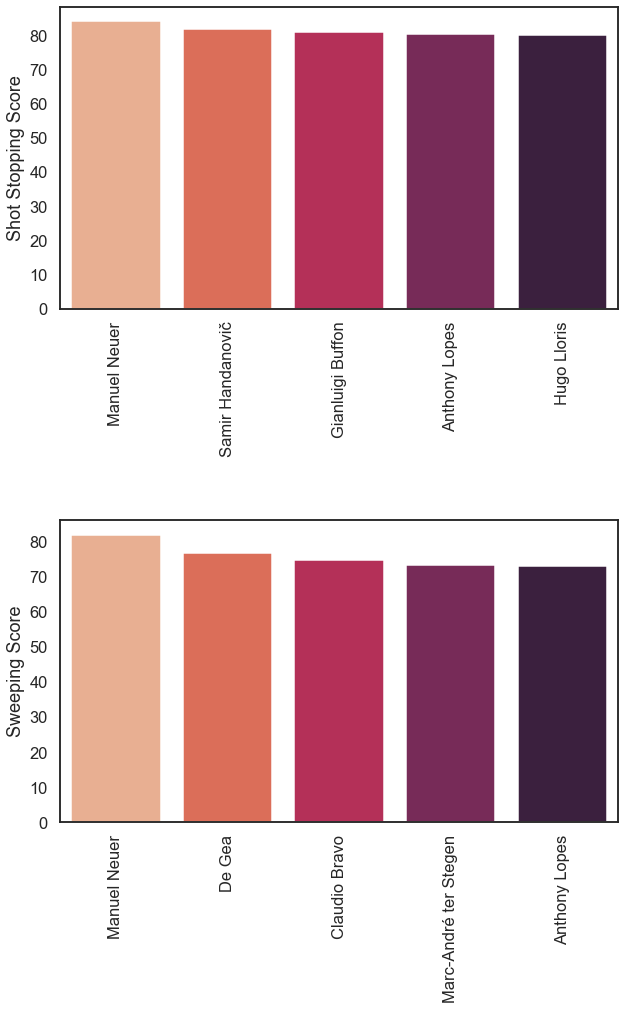

In [25]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15), sharex=False)

# Generate some sequential data
ss = data.sort_values('GK_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['GK_Shot_Stopper']))
ss = data.sort_values('GK_Sweeper', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['GK_Sweeper']))

sns.barplot(x1, y1, palette="rocket_r", ax=ax1)
ax1.set_ylabel("Shot Stopping Score")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.subplots_adjust(hspace = 0.7)


sns.barplot(x2, y2, palette='rocket_r', ax=ax2)
ax2.set_ylabel("Sweeping Score")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


As we can see from the chart, I am selecting three GK as listed below:

<b>Manuel Neuer</b>

<b>Samir Handanovic</b>

<b>De Gea</b>

We will create below four categories for our defenders:

1) <b>Hulk Defender</b>: A one who would show aggression, precision in tackling and lead the defense

2) <b>Sweeper</b>: Someone who can step up and lead in oppositions aerial attacks, corners, show vision and distribution going forward

3) <b>Wing Backs</b>: My team need wing backs to assist for a goal!

In [20]:
#Defending Traits

data['data_Hulk'] = (c*data.Marking + c*data.Sliding_Tackle + c*data.Standing_Tackle + c*data.Aggression + a*data.Reactions 
                   + b*data.Interceptions + d*data.Strength + b*data.Jumping + c*data.Heading)/(5*c + 2*b + a + d)

data['data_Sweeper'] = (c*data.Marking + c*data.Ball_Control + b*data.Reactions + b*data.Balance + d*data.Vision + c*data.Crossing 
                      + b*data.Composure + c*data.Short_Pass + b*data.Long_Pass)/(4*b + 4*c + d)

data['data_Wing_Back'] = (b*data.Ball_Control + a*data.Dribbling + a*data.Marking + c*data.Sliding_Tackle + b*data.Standing_Tackle 
                        + c*data.Attacking_Position + d*data.Vision + c*data.Crossing + b*data.Short_Pass + b*data.Long_Pass 
                        + d*data.Acceleration +d*data.Speed + c*data.Stamina + a*data.Finishing)/(3*a + 4*b + 4*c + 3*d)

We will pick defenders for each category like playing 11, substitutes and reserves.

So, 2 Center Back and 2 Wing Back in our playing 11. But 1 CB will be from our sweeper category to increase our attacking power.

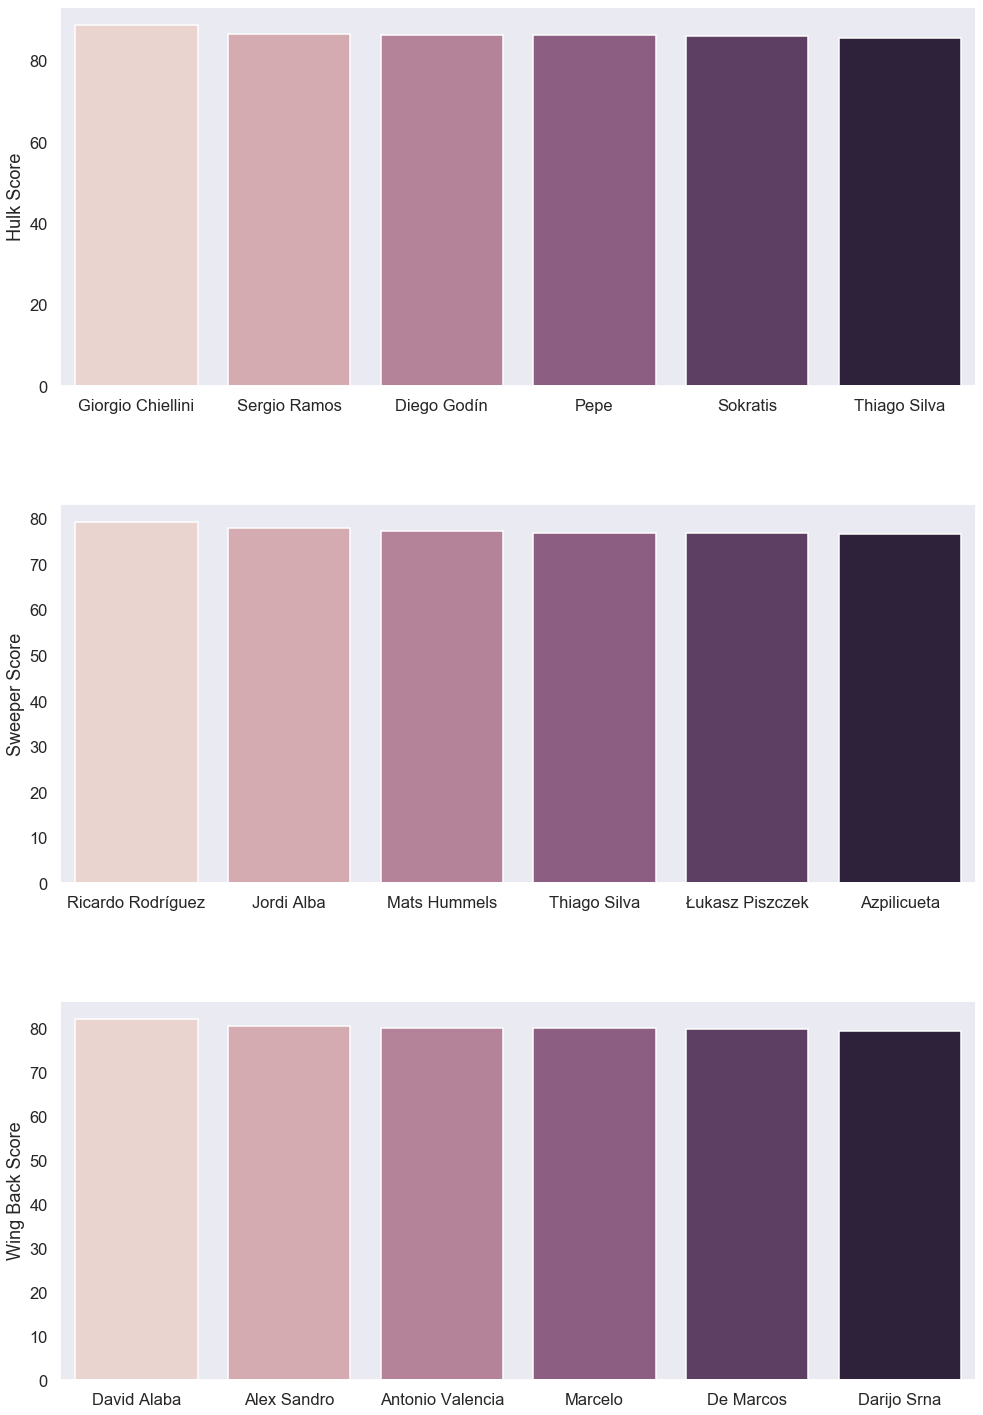

In [28]:
sns.set(style="dark", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 20), sharex=False)

# Generate some sequential data
ss = data[(data['Club_Position'] == 'CB') | (data['Club_Position'] == 'LCB') | (data['Club_Position'] == 'RCB')].sort_values('data_Hulk', ascending=False)[:6]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['data_Hulk']))

ss = data[(data['Club_Position'] == 'CB') | (data['Club_Position'] == 'LCB') | (data['Club_Position'] == 'RCB')].sort_values('data_Sweeper', ascending=False)[:6]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['data_Sweeper']))

ss = data[(data['Club_Position'] == 'LWB') | (data['Club_Position'] == 'LB') | (data['Club_Position'] == 'RWB') | (data['Club_Position'] == 'RB')].sort_values('data_Wing_Back', ascending=False)[:6]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['data_Wing_Back']))

sns.barplot(x1, y1, palette=sns.cubehelix_palette(6), ax=ax1)
ax1.set_ylabel("Hulk Score")

sns.barplot(x2, y2, palette=sns.cubehelix_palette(6), ax=ax2)
ax2.set_ylabel("Sweeper Score")

sns.barplot(x3, y3, palette=sns.cubehelix_palette(6), ax=ax3)
ax3.set_ylabel("Wing Back Score")

plt.tight_layout(h_pad=5)

We are going to select 2 CB from Hulk category, 3 from Sweeper and 3 from Wing Back.

Center backs:

<b>Girogio Chiellini</b>

<b>Sergio Ramos</b>

Sweepers:

<b>Ricardo Rodriguez</b>

<b>Jordi Alba</b>

<b>Mats Hummels</b>

Wing Backs:

<b>David Alaba</b>

<b>Alex Sandro</b>

<b>Antonio Valencia</b> Whaaaatttt !!!!!!!

This dataset is from 2017 so we dont have <b>Virgil Van Djik</b> as CB. Also, players like <b>Trent Alexander Arnold</b>, <b>Andrew Robertson</b> and <b>Joshua Kimmich</b> are not in the wing backs.

In [22]:
#Midfielding Traits

data['MF_controller'] = (a*data.Weak_foot + d*data.Ball_Control + a*data.Dribbling + a*data.Marking + a*data.Reactions 
                       + d*data.Vision + c*data.Composure + d*data.Short_Pass + d*data.Long_Pass)/(c + 4*d + 4*a)

data['MF_beast'] = (b*data.Agility + b*data.Balance + b*data.Jumping + c*data.Strength + c*data.Stamina + b*data.Speed 
                  + a*data.Acceleration + b*data.Short_Pass + d*data.Aggression + d*data.Reactions + d*data.Marking 
                  + c*data.Standing_Tackle + c*data.Sliding_Tackle + d*data.Interceptions)/(a + 5*b + 4*c + 4*d)

data['MF_playmaker'] = (c*data.Ball_Control + c*data.Dribbling + a*data.Marking + b*data.Reactions + d*data.Vision 
                      + c*data.Crossing + c*data.Short_Pass + c*data.Long_Pass + a*data.Curve + a*data.Long_Shots 
                      + d*data.Freekick_Accuracy)/(3*a + b + 5*c + 2*d)

data['MF_attacker'] = (b*data.Ball_Control + c*data.Dribbling + b*data.Vision + b*data.Crossing + b*data.Short_Pass 
                     + b*data.Long_Pass + c*data.Agility + a*data.Curve + c*data.Long_Shots + c*data.Finishing
                     + c*data.Freekick_Accuracy + d*data.Finishing)/(a + 5*b + 5*c + d)

Text(0, 0.5, 'Attacker Score')

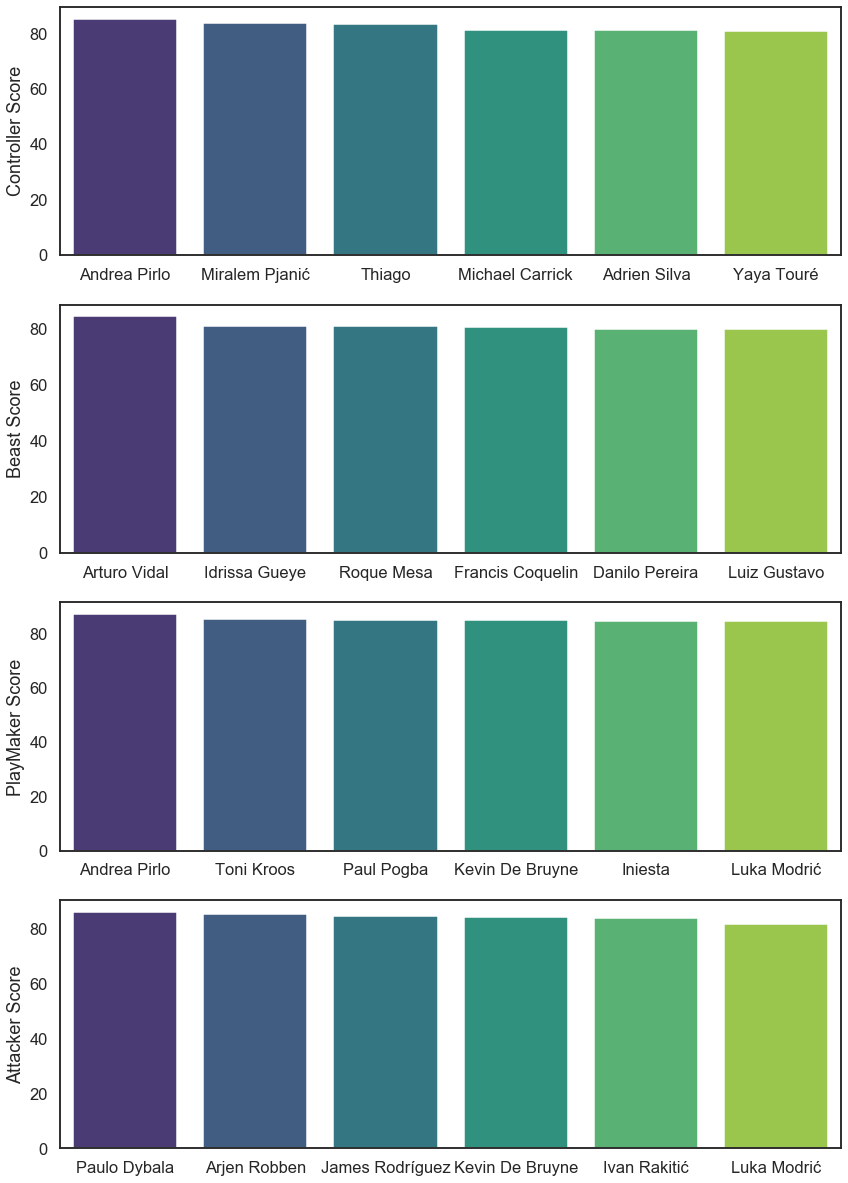

In [30]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 21), sharex=False)

# Generate some sequential data
ss = data[(data['Club_Position'] == 'CDM') | (data['Club_Position'] == 'CM') | (data['Club_Position'] == 'LDM') | (data['Club_Position'] == 'RDM')].sort_values('MF_controller', ascending=False)[:6]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['MF_controller']))
ss = data[(data['Club_Position'] == 'CDM') | (data['Club_Position'] == 'CM') | (data['Club_Position'] == 'LDM') | (data['Club_Position'] == 'RDM')].sort_values('MF_beast', ascending=False)[:6]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['MF_beast']))
ss = data[(data['Club_Position'] == 'CM') | (data['Club_Position'] == 'LCM') | (data['Club_Position'] == 'RCM') | (data['Club_Position'] == 'LM') | (data['Club_Position'] == 'RM')].sort_values('MF_playmaker', ascending=False)[:6]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['MF_playmaker']))
ss = data[(data['Club_Position'] == 'CM') | (data['Club_Position'] == 'RM')| (data['Club_Position'] == 'LCM') | (data['Club_Position'] == 'RCM') | (data['Club_Position'] == 'LM') | (data['Club_Position'] == 'RM')| (data['Club_Position'] == 'CAM')].sort_values('MF_attacker', ascending=False)[:6]
x4 = np.array(list(ss['Name']))
y4 = np.array(list(ss['MF_attacker']))

sns.barplot(x1, y1, palette=sns.color_palette("viridis", n_colors=6), ax=ax1)
ax1.set_ylabel("Controller Score")
sns.barplot(x2, y2, palette=sns.color_palette("viridis", n_colors=6), ax=ax2)
ax2.set_ylabel("Beast Score")
sns.barplot(x3, y3, palette=sns.color_palette("viridis", n_colors=6), ax=ax3)
ax3.set_ylabel("PlayMaker Score")
sns.barplot(x4, y4, palette=sns.color_palette("viridis", n_colors=6), ax=ax4)
ax4.set_ylabel("Attacker Score")

We are going to select midfielders for playing 11, substitues and reserves. So, we will select 2 players from each category.

Controllers:

<b>Andrea Pirlo</b>

<b>Miralem Pjanic</b>

Beasts:

<b>Arturo Vidal</b>

<b>Idrissa Gueye</b> - What a surprise!!!

Playmakers:

<b>Toni Kroos</b>

<b>Paul Pogba</b>

Attackers:

<b>Paulo Dybala</b>

<b>James Rodriguez</b>

Arjen Robben - We are ignoring him because he never plays in the middle, he plays usually on right wing.

Now, let's find the best attacking line by selecting 2 LW, 2 RW and 2 ST.

In [31]:
#Attackers Traits

data['AT_left_wing'] = (d*data.Weak_foot + c*data.Ball_Control + c*data.Dribbling + c*data.Speed + d*data.Acceleration 
                        + b*data.Vision + c*data.Crossing + b*data.Short_Pass + b*data.Long_Pass + b*data.Aggression + c*data.Penalties
                        + b*data.Agility + a*data.Curve + c*data.Long_Shots + b*data.Freekick_Accuracy + d*data.Finishing)/(a + 6*b + 6*c + 3*d)

data['AT_right_wing'] = (d*data.Weak_foot + c*data.Ball_Control + c*data.Dribbling + c*data.Speed + d*data.Acceleration 
                         + b*data.Vision + c*data.Crossing + b*data.Short_Pass + b*data.Long_Pass + b*data.Aggression + c*data.Penalties
                         + b*data.Agility + a*data.Curve + c*data.Long_Shots + b*data.Freekick_Accuracy + d*data.Finishing)/(a + 6*b + 6*c + 3*d)

data['AT_Striker'] = (d*data.Weak_foot + b*data.Ball_Control + b*data.Vision + b*data.Aggression + b*data.Agility 
                      + a*data.Curve + a*data.Long_Shots + d*data.Balance + d*data.Finishing + d*data.Heading 
                      + c*data.Jumping + c*data.Dribbling + c*data.Penalties)/(2*a + 4*b + 3*c + 4*d)

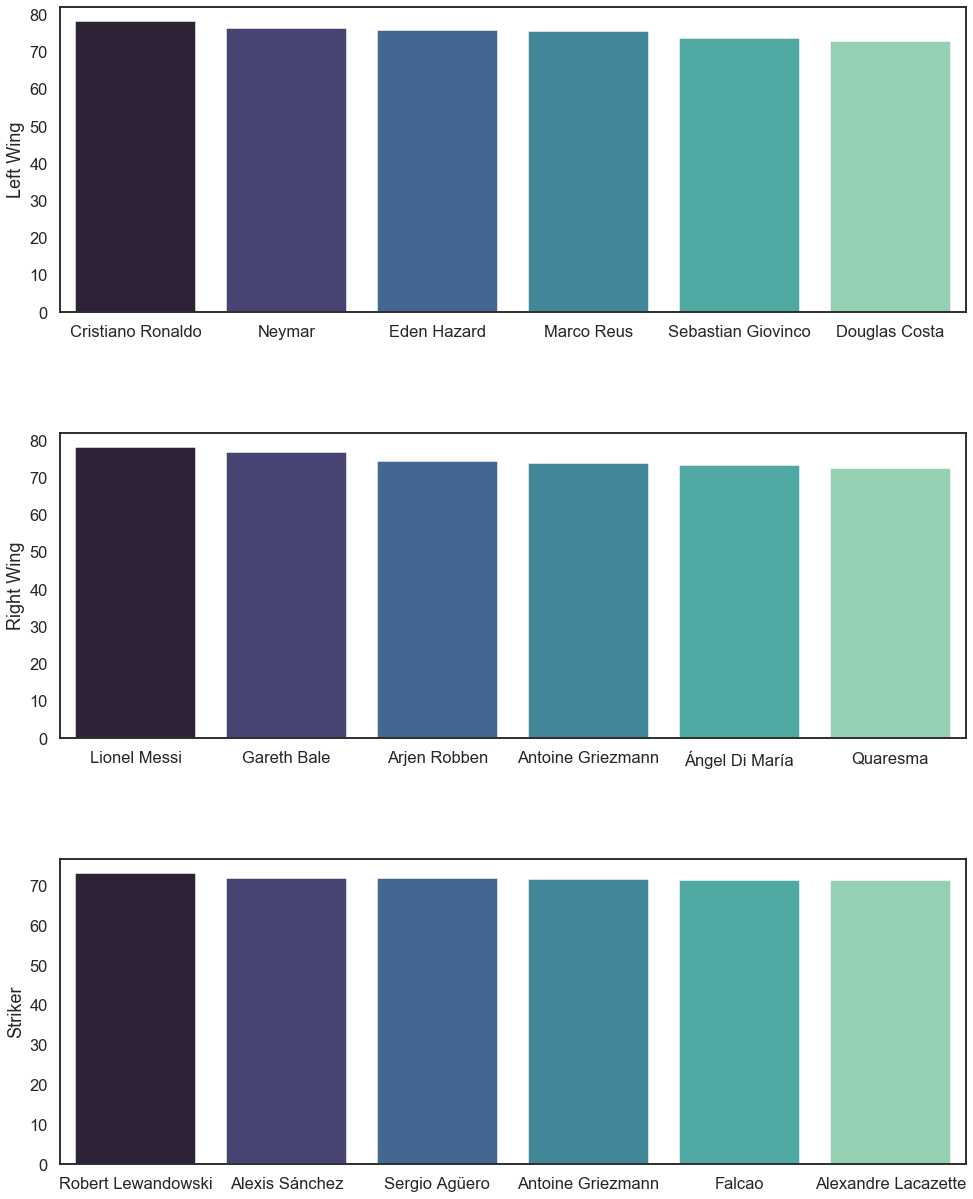

In [34]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 17), sharex=False)

# Generate some sequential data
ss = data[(data['Club_Position'] == 'LW') | (data['Club_Position'] == 'LM') | (data['Club_Position'] == 'LS')].sort_values('AT_left_wing', ascending=False)[:6]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['AT_left_wing']))
ss = data[(data['Club_Position'] == 'RW') | (data['Club_Position'] == 'RM') | (data['Club_Position'] == 'RS')].sort_values('AT_right_wing', ascending=False)[:6]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['AT_right_wing']))
ss = data[(data['Club_Position'] == 'ST') | (data['Club_Position'] == 'LS') | (data['Club_Position'] == 'RS') | (data['Club_Position'] == 'CF')].sort_values('AT_Striker', ascending=False)[:6]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['AT_Striker']))

sns.barplot(x1, y1, palette=sns.color_palette('mako', n_colors=6), ax=ax1)
ax1.set_ylabel("Left Wing")
sns.barplot(x2, y2, palette=sns.color_palette("mako", n_colors=6), ax=ax2)
ax2.set_ylabel("Right Wing")
sns.barplot(x3, y3, palette=sns.color_palette("mako", n_colors=6), ax=ax3)
ax3.set_ylabel("Striker")

plt.tight_layout(h_pad=5)

We got the best attack line here.

On the left wing:

<b>Cristiano Ronaldo</b>

<b>Neymar</b>

On the right Wing:

<b>Lionel Messi</b>

<b>Gareth Bale</b>

Strikers:

<b>Robert Lewandowski</b> - or should I say Lewan<b>GOAL</b>ski ???

<b>Alexis Sanchez</b> - Surprise again......

----------------------------------------------------------------------------------------------------------------------------------------------------------

# Let's Take a look at our dream team in the year of 2017!

<b>Goalkeepers:</b> Manuel Neuer, Samir Handanovic, David De Gea

<b>Centre Backs:</b> Girogio Chiellini, Sergio Ramos, Mats Hummels, Ricardo Rodriguez

<b>Wing Backs:</b> Jordi Alba, David Alaba, Alex Sandro

<b>Defensive Mid:</b> Arturo Vidal, Miralem Pjanic

<b>Central Attacking Mid:</b> Andrea Pirlo, Paul Pogba, Toni Kroos, Paulo Dybala, James Rodriguez

<b>Wingers:</b> Lionel Messi, Cristiano Ronaldo, Neymar, Gareth Bale

<b>Strikers:</b> Robert Lewandowaski, Alexis Sanchez